In [3]:
import pandas as pd

In [4]:
file_path = "Vigitel-2019-peso-rake.xls"
df = pd.read_excel(file_path, sheet_name='Sheet1')
df

,chave,replica,ano,cidade,q6,q7,q8a,q8b,q8_anos,q9,...,papatres,hart,diab,ind_med_has,med_has,trat_med_has,ind_med_db,med_db,insulina,trat_med_db
0,311666031,29,2019,27,88,1,1,3.0,3,74,...,NaN,1,0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
1,318136030,4,2019,27,65,1,8,NaN,0,57,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1321836026,6,2019,10,68,1,1,3.0,3,777,...,NaN,1,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0
3,2323676021,16,2019,10,79,1,1,3.0,3,62,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2323716024,22,2019,10,70,1,1,3.0,3,66,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52438,94312585036,4,2019,17,70,2,6,5.0,16,57,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52439,98318694029,1,2019,7,87,2,6,4.0,15,38,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52440,18315885032,25,2019,17,86,2,6,4.0,15,777,...,NaN,1,0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
52441,49311605030,3,2019,17,75,2,6,4.0,15,75,...,NaN,1,0,1.0,1.0,1.0,NaN,NaN,NaN,NaN


In [17]:
df_input = pd.DataFrame()
df_input["peso"] = df["q9"]
df_input["peso"] = df_input.loc[(df_input.peso > 0) & (df_input.peso < 150)]
print(df_input.shape)
df_input["altura"] = df["q11"]
print(df_input.shape)
#df_input.loc[(df_input.altura > 0) & (df_input.altura < 250)]
# if df_input.loc[(df_input.altura > 0) & (df_input.altura < 250)]:
#     df_input["altura"] = df_input.loc[(df_input.altura > 0) & (df_input.altura < 250)]
# else:
#     df_input["altura"] = 0

#df_input["altura"] = df_input.loc[(df_input.altura > 0) & (df_input.altura < 250)]

#print(df_input_2.shape)
df_input["diabetes"] = df["q76"]
df_input["atividades_minutos"] = df["r148_mm"]

print(df_input["atividades_minutos"] > 0)
df_input = df_input.dropna()
df_input

(52443, 1)
(52443, 2)
0        False
1        False
2        False
3        False
4        False
         ...  
52438    False
52439     True
52440    False
52441    False
52442    False
Name: atividades_minutos, Length: 52443, dtype: bool


,peso,altura,diabetes,atividades_minutos,idade
0,74.0,168,2,0.0,88
13,62.0,170,2,0.0,22
15,90.0,170,2,0.0,61
34,70.0,170,2,0.0,71
35,64.0,176,2,0.0,54
...,...,...,...,...,...
52301,70.0,172,2,0.0,72
52302,43.0,150,2,777.0,86
52359,56.0,135,2,777.0,86
52380,50.0,152,2,777.0,85


In [6]:
df_new = pd.DataFrame()
df_new = df_input.loc[(df_input.altura > 0) & (df_input.altura < 250)]
df_new = df_new.dropna()
df_new

,peso,altura,diabetes,atividades_minutos
0,74.0,168,2,0.0
13,62.0,170,2,0.0
15,90.0,170,2,0.0
34,70.0,170,2,0.0
35,64.0,176,2,0.0
...,...,...,...,...
52301,70.0,172,2,0.0
52302,43.0,150,2,777.0
52359,56.0,135,2,777.0
52380,50.0,152,2,777.0


In [7]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [8]:
m = KMeans(10)
m.fit(df_new)

/Users/palhares/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

<Axes: xlabel='altura', ylabel='peso'>

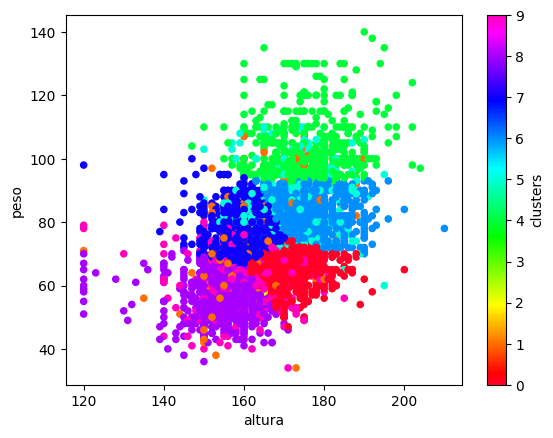

In [9]:
df_new['clusters'] = m.labels_
df_new.plot.scatter('altura','peso', c='clusters', colormap='gist_rainbow')

{'whiskers': [<matplotlib.lines.Line2D at 0x127a313d0>,
 'caps': [<matplotlib.lines.Line2D at 0x127ae6940>,
 'boxes': [<matplotlib.lines.Line2D at 0x127ae6790>],
 'medians': [<matplotlib.lines.Line2D at 0x127ae6e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x127b01160>],
 'means': []}

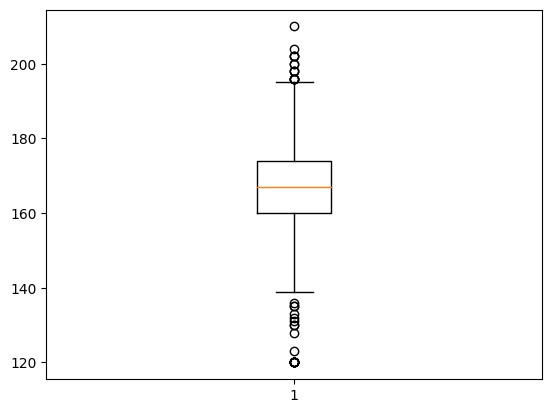

In [10]:
plt.boxplot(df_new.altura)

{'whiskers': [<matplotlib.lines.Line2D at 0x127b58820>,
 'caps': [<matplotlib.lines.Line2D at 0x127b58d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x127b58580>],
 'medians': [<matplotlib.lines.Line2D at 0x127b672e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x127b67580>],
 'means': []}

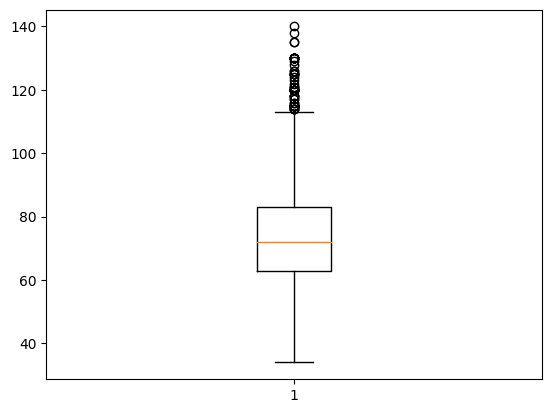

In [11]:
plt.boxplot(df_new.peso)

{'whiskers': [<matplotlib.lines.Line2D at 0x127bca880>,
 'caps': [<matplotlib.lines.Line2D at 0x127bcadc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x127bca5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x127bd9340>],
 'fliers': [<matplotlib.lines.Line2D at 0x127bd95e0>],
 'means': []}

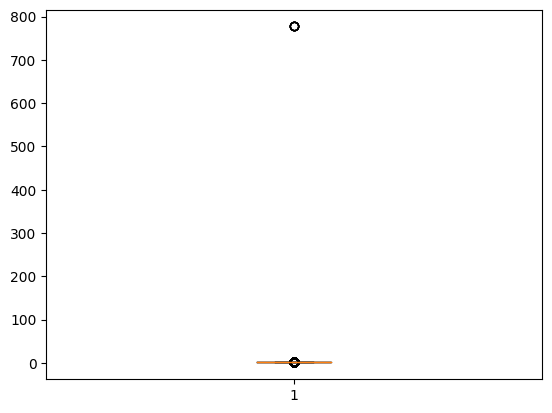

In [12]:
plt.boxplot(df_new.diabetes)

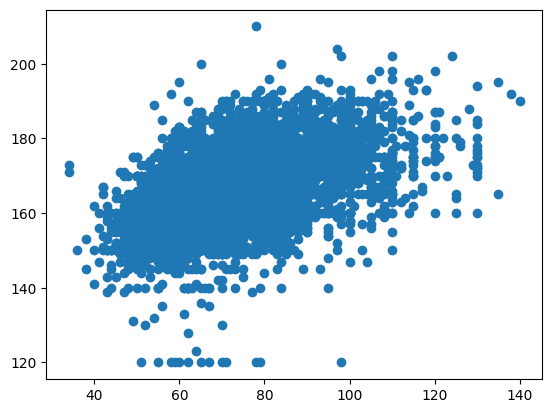

In [13]:
plt.scatter(x = df_new.peso, y = df_new.altura)

/Users/palhares/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/palhares/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/palhares/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/palhares/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

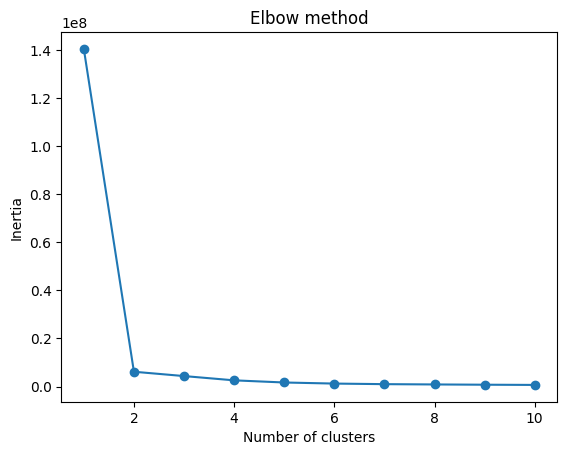

In [14]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_new)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

/Users/palhares/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


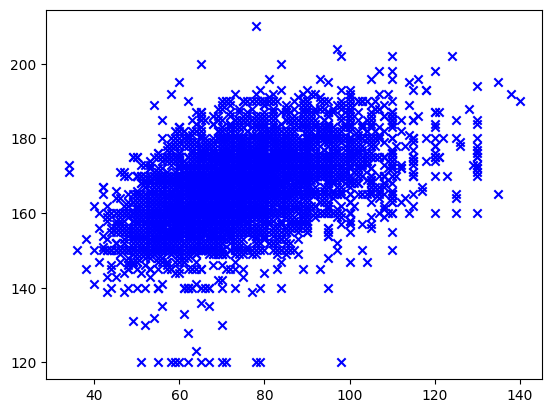

In [15]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_new)

peso_e_altura = plt.scatter(df_new.peso, df_new.altura, marker='x', color='b')

#plt.legend('Peso', 'Altura', loc='lower left')
# plt.legend((lo, ll, l, a, h, hh, ho),
#            ('Low Outlier', 'LoLo', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'),
#            scatterpoints=1,
#            loc='lower left',
#            ncol=3,
#            fontsize=8)
#plt.scatter(df_new.peso, df_new.altura, c=kmeans.labels_)

# plt.legend((peso_e_altura), 
#            ('Peso e altura'),
#           scatterpoints=1,
#           loc='lower left',
#           ncol=3,
#           fontsize=8)

plt.show()

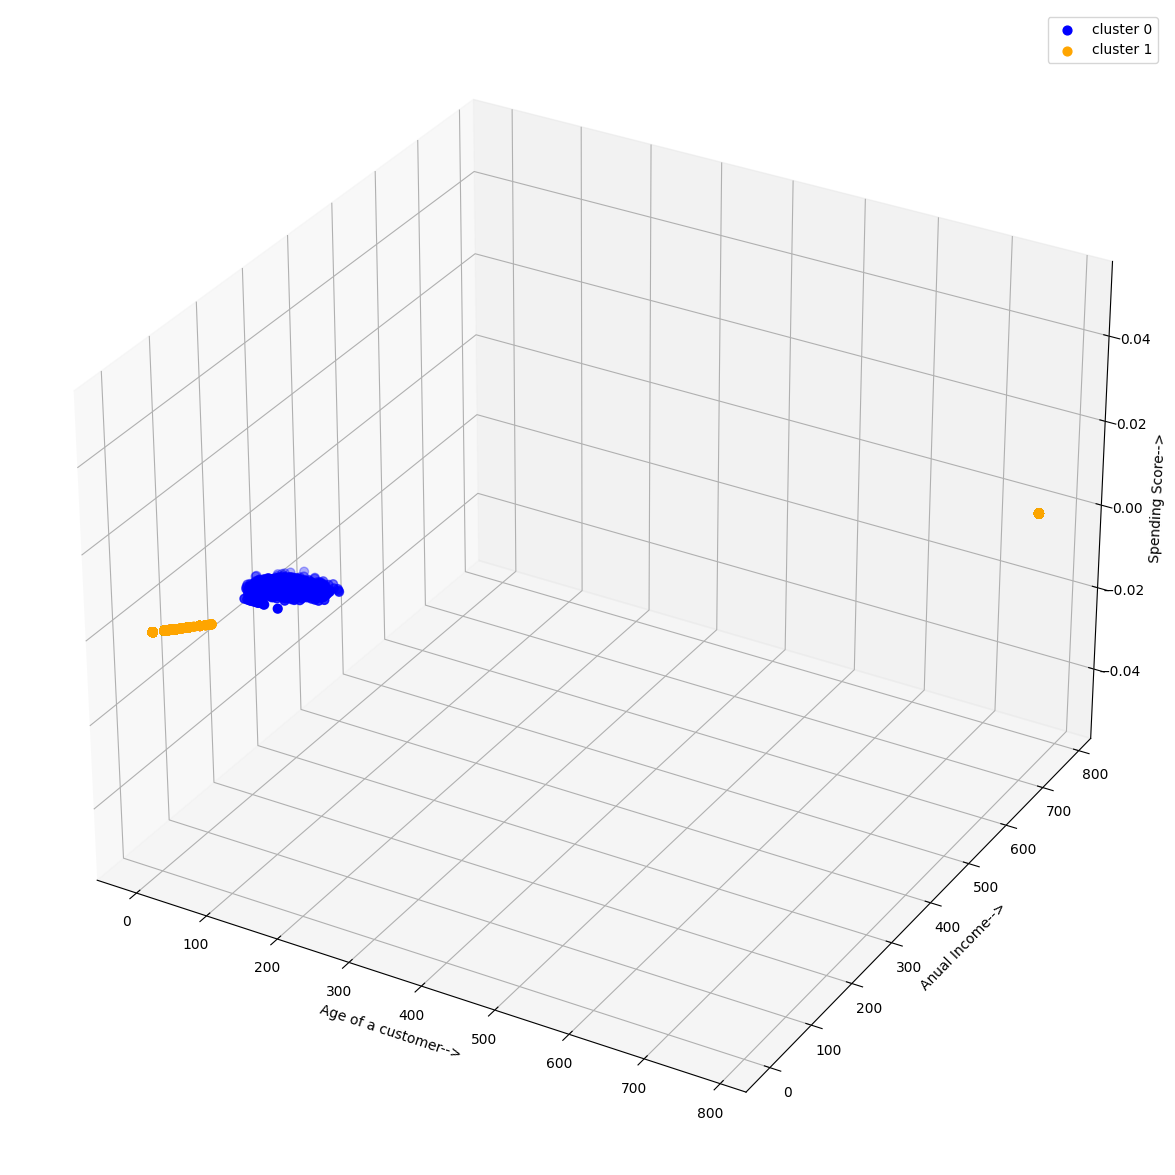

In [16]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
# ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
# ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
# ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
# ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.scatter(df_new.peso, df_new.altura, s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(df_new.atividades_minutos, df_new.atividades_minutos, s = 40 , color = 'orange', label = "cluster 1")
ax.set_xlabel('Age of a customer-->')
ax.set_ylabel('Anual Income-->')
ax.set_zlabel('Spending Score-->')
ax.legend()
plt.show()